# Modules
To analyse data in Python, we will be using an external module called [SciPy](https://www.scipy.org/). We also need to import numpy and pandas, because we will be analysing data stored in pandas dataframes. Finally, we will import some plotnine modules to allow us to visualise the data that we are analysing.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from plotnine import ggplot, aes, geom_histogram, geom_point

# Data
To demonstrate the data analysis functionality of Python, we will use the metabric dataset. Some of the functions we will use do not handle missing data, so we will remove any rows for the dataset where data is missing. As we saw in week 3, we can use the **describe()** method to generate summary statistics for this dataset:

In [2]:
metabric = pd.read_csv("../data/metabric_clinical_and_expression_data.csv").dropna()
metabric.describe()

,Cohort,Age_at_diagnosis,Survival_time,Tumour_size,Tumour_stage,Neoplasm_histologic_grade,Lymph_nodes_examined_positive,Lymph_node_status,Nottingham_prognostic_index,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,2.207850,60.412721,126.239518,26.094112,1.756467,2.445138,1.873327,1.626227,4.123553,5.467440,9.600854,10.770958,6.238728,6.191980,5.950108,9.530585,10.839721,11.383495
std,0.956449,13.012218,77.295543,15.102221,0.622865,0.635888,3.830332,0.739443,1.059818,3.859249,2.093524,1.317631,1.020860,0.389334,0.310095,1.468576,1.687979,1.630174
min,1.000000,21.930000,0.100000,1.000000,1.000000,1.000000,0.000000,1.000000,2.002000,1.000000,5.217238,7.281883,4.945672,5.225320,5.158697,5.401414,5.289602,5.323652
25%,1.000000,50.820000,60.133333,17.000000,1.000000,2.000000,0.000000,1.000000,3.052000,3.000000,8.205776,9.981831,5.422349,5.936286,5.730861,8.809316,10.878608,11.071585
50%,2.000000,60.930000,116.433333,22.000000,2.000000,3.000000,0.000000,1.000000,4.046000,5.000000,10.220349,10.532638,5.864217,6.176018,5.931565,9.917441,11.365047,11.857401
75%,3.000000,69.700000,188.733333,30.000000,2.000000,3.000000,2.000000,2.000000,5.046000,7.000000,11.202333,11.149977,6.902124,6.439989,6.134401,10.554370,11.749098,12.374549
max,5.000000,96.290000,337.033333,180.000000,4.000000,3.000000,41.000000,3.000000,6.360000,46.000000,13.265184,14.643900,9.932115,7.769900,8.708396,12.812082,13.127682,14.432001


# Statistical tests

## Tests for normality
When we are deciding which statistical test to use in our analysis, we often need to work out whether the data follows a normal distribution or not, as some tests (e.g. t-test) assume that our data are normally distributed. We can test whether a dataset follows a normal distribution by using the Kolmogorov-Smirnov test:

## Correlation
We often want to test whether two continuous variables are related to each other, and we can do this by calculating a correlation. For example, there appears to be a relationship between the expression of the ESR1 gene and the GATA3 gene:

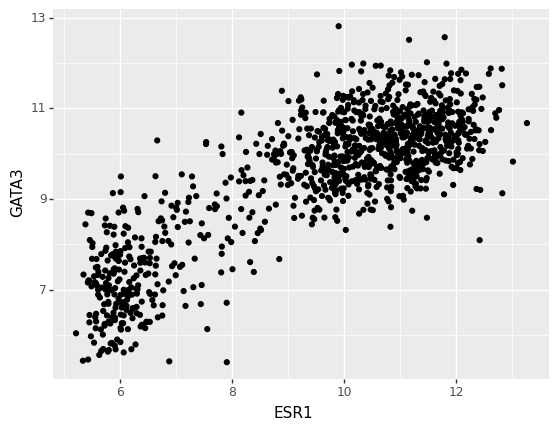

<ggplot: (-9223371866336140352)>

In [3]:
(
ggplot(metabric, aes("ESR1", "GATA3"))
    + geom_point()
)

For normally distributed data, we can use the Pearson's correlation:

In [4]:
size_mutation_pearson = sp.stats.pearsonr(metabric["ESR1"], metabric["GATA3"])
print("Pearson correlation:")
print("coefficient =", size_mutation_pearson[0])
print("p value =", size_mutation_pearson[1])

Pearson correlation:
coefficient = 0.8282016709899257
p value = 1.134210930536034e-283


For data that is not normally distributed, we can use the Spearman rank correlation:

In [5]:
size_mutation_spearman = sp.stats.spearmanr(metabric["ESR1"], metabric["GATA3"])
print("Spearman rank correlation:")
print("coefficient =", size_mutation_spearman[0])
print("p value =", size_mutation_spearman[1])

Spearman rank correlation:
coefficient = 0.6974366204189892
p value = 4.1664956664705384e-164


## T-test

## ANOVA

## Chi-square

# Transformations

# Modelling

## Linear regression

## Logistic regression